In [8]:
import temporian as tp

import pandas as pd
import numpy as np

In [9]:
# Generate a synthetic dataset
timestamps = np.arange(0,100,0.1)
n = len(timestamps)
noise = 0.1 * np.random.randn(n)
trend = 0.01 * timestamps
season = 0.4 * np.sin(0.5 * timestamps)

raw_data = pd.DataFrame({
    "timestamp": timestamps,
    "noise": noise,
    "trend": trend,
    "seasoon": season,
    "signal": noise + trend + season
})

raw_data

,timestamp,noise,trend,seasoon,signal
0,0.0,-0.126005,0.000,0.000000,-0.126005
1,0.1,0.080936,0.001,0.019992,0.101927
2,0.2,-0.065122,0.002,0.039933,-0.023189
3,0.3,-0.032947,0.003,0.059775,0.029828
4,0.4,0.027688,0.004,0.079468,0.111156
...,...,...,...,...,...
995,99.5,-0.095129,0.995,-0.197182,0.702689
996,99.6,0.011930,0.996,-0.179542,0.828388
997,99.7,-0.095425,0.997,-0.161453,0.740122
998,99.8,0.180737,0.998,-0.142960,1.035777


In [10]:
# Convert the dataset into a Temporian dataset

source_data = tp.EventData.from_dataframe(raw_data)

source_data

data (1):
    ():
        noise <FLOAT64> (1000): [-0.126   0.0809 -0.0651 ... -0.0954  0.1807 -0.0106]
        trend <FLOAT64> (1000): [0.    0.001 0.002 ... 0.997 0.998 0.999]
        seasoon <FLOAT64> (1000): [ 0.      0.02    0.0399 ... -0.1615 -0.143  -0.1241]
        signal <FLOAT64> (1000): [-0.126   0.1019 -0.0232 ...  0.7401  1.0358  0.8643]
sampling:
    index: []
    data (1):
        () (1000): [ 0.   0.1  0.2 ... 99.7 99.8 99.9]

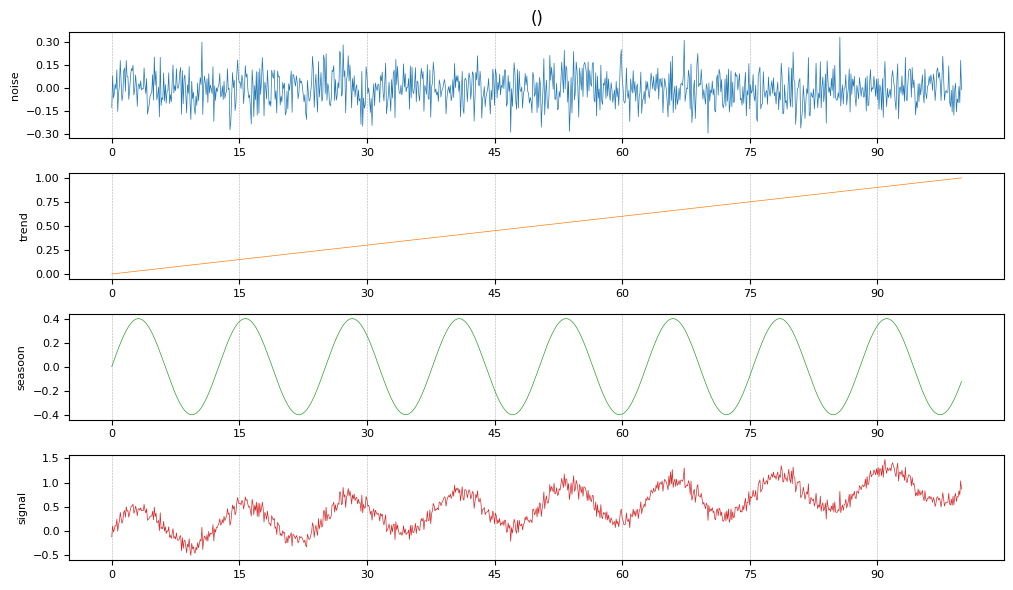

In [11]:
# Plot the dataset
_ = source_data.plot()

In [12]:
# Compute some signals
source = source_data.schema()
result = tp.glue(
    tp.prefix("sma_10.", tp.simple_moving_average(source["signal"], 10)),
    tp.prefix("sma_20.", tp.simple_moving_average(source["signal"], 20)),
    tp.prefix("sma_50.", tp.simple_moving_average(source["signal"], 50)),
)

result_data = tp.evaluate(result,{source: source_data})

result_data

Build schedule
Run 10 operators
    1 / 10: SELECT [0.00003 s]
    2 / 10: SIMPLE_MOVING_AVERAGE [0.00007 s]
    3 / 10: SELECT [0.00002 s]
    4 / 10: SELECT [0.00002 s]
    5 / 10: PREFIX [0.00002 s]
    6 / 10: SIMPLE_MOVING_AVERAGE [0.00006 s]
    7 / 10: SIMPLE_MOVING_AVERAGE [0.00004 s]
    8 / 10: PREFIX [0.00002 s]
    9 / 10: PREFIX [0.00125 s]
    10 / 10: GLUE [0.00006 s]
Execution in 0.00307 s


data (1):
    ():
        sma_10.signal <FLOAT64> (1000): [-0.126  -0.012  -0.0158 ...  0.9198  0.9185  0.9143]
        sma_20.signal <FLOAT64> (1000): [-0.126  -0.012  -0.0158 ...  0.827   0.8272  0.8253]
        sma_50.signal <FLOAT64> (1000): [-0.126  -0.012  -0.0158 ...  0.7398  0.7411  0.7419]
sampling:
    index: []
    data (1):
        () (1000): [ 0.   0.1  0.2 ... 99.7 99.8 99.9]

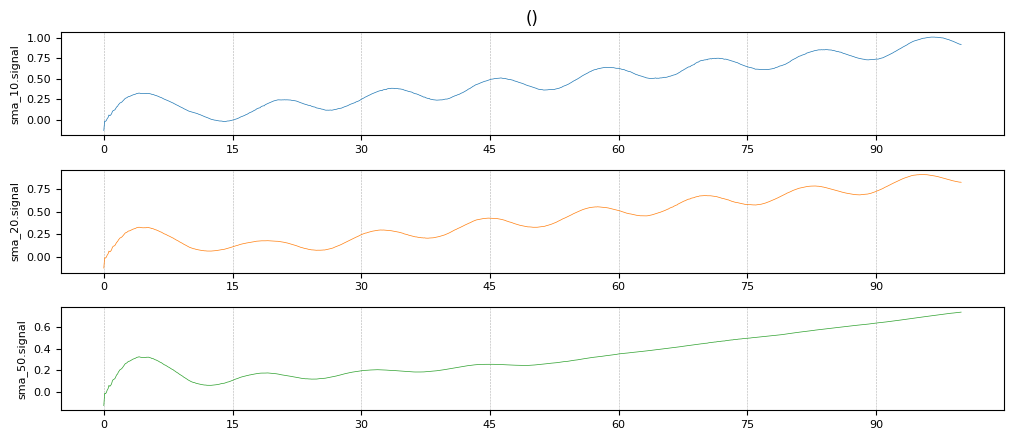

In [13]:
# Plot the results
_ = result_data.plot()

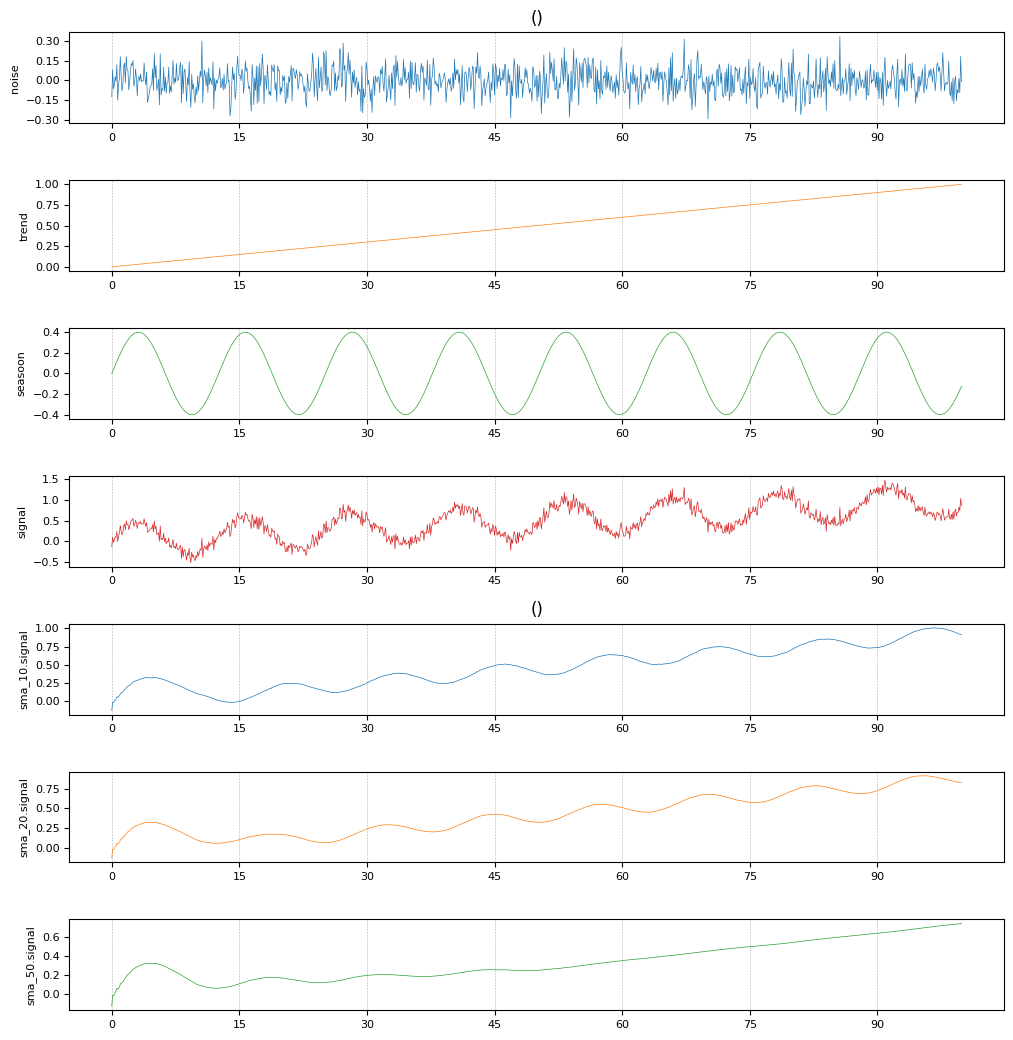

In [14]:
# Plot both the source and result data

_ = tp.plot([source_data, result_data])